# Recurrent Neural Networks - Case 1

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## Data
https://fred.stlouisfed.org/series/S4248SM144NCEN

In [2]:
df = pd.read_csv('data/Alcohol_Sales_2020.csv',index_col='DATE',parse_dates=True)
df.index.freq = 'MS'

In [3]:
df.head()

,S4248SM144NCEN
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


In [4]:
df.columns = ['Sales']

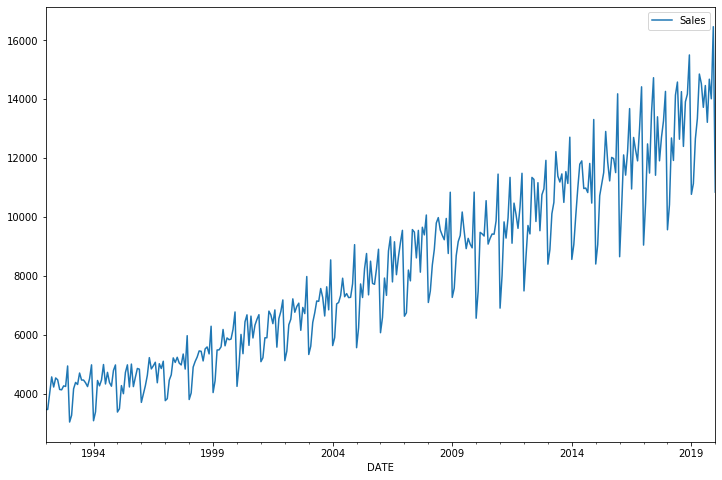

In [6]:
df.plot(figsize=(12,8));

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

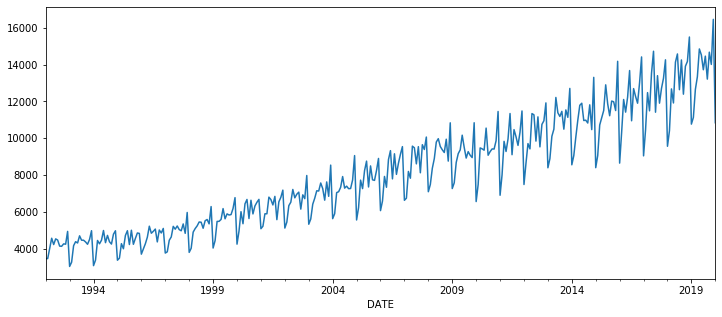

In [15]:
results = seasonal_decompose(df['Sales'])
results.observed.plot(figsize=(12,5));

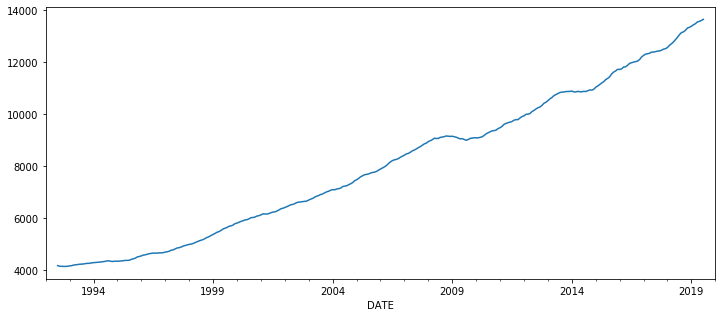

In [16]:
results.trend.plot(figsize=(12,5));

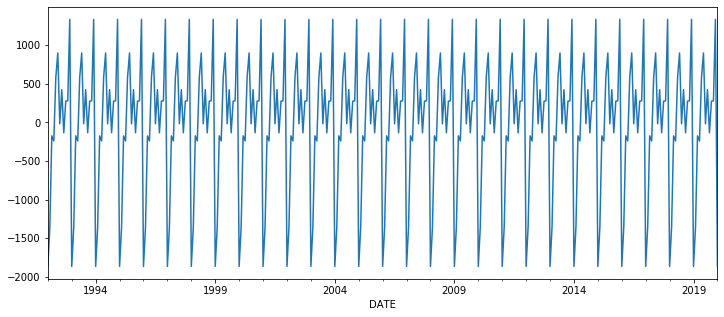

In [17]:
results.seasonal.plot(figsize=(12,5));

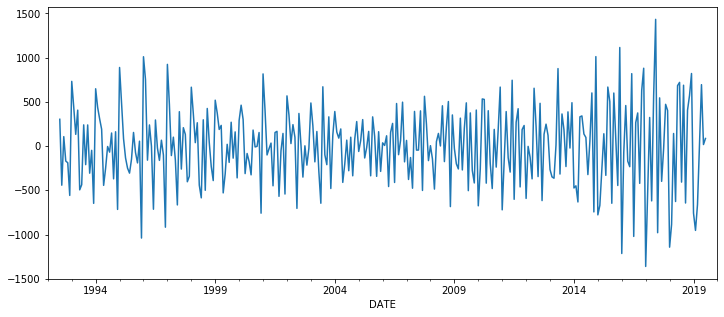

In [18]:
results.resid.plot(figsize=(12,5));

## Train Test Split

In [24]:
nobs = 12
train = df.iloc[:-nobs]
test = df.iloc[-nobs:]
len(test)

12

## Scale Data

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
scaler = MinMaxScaler()

In [27]:
# IGNORE WARNING ITS JUST CONVERTING TO FLOATS
# WE ONLY FIT TO TRAININ DATA, OTHERWISE WE ARE CHEATING ASSUMING INFO ABOUT TEST SET
scaler.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [28]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

# Time Series Generator

This class takes in a sequence of data-points gathered at
equal intervals, along with time series parameters such as
stride, length of history, etc., to produce batches for
training/validation.

In [30]:
from keras.preprocessing.sequence import TimeseriesGenerator

Using TensorFlow backend.


In [31]:
scaled_train

array([[0.03431412],
       [0.03423395],
       [0.07784815],
       [0.12290548],
       [0.09540608],
       [0.12009941],
       [0.1150485 ],
       [0.08867153],
       [0.08778963],
       [0.09845266],
       [0.09692937],
       [0.1527299 ],
       [0.        ],
       [0.01843983],
       [0.09051551],
       [0.10791309],
       [0.10230097],
       [0.13348833],
       [0.11440712],
       [0.11432695],
       [0.10687084],
       [0.09660867],
       [0.11777439],
       [0.15577648],
       [0.00352762],
       [0.02773992],
       [0.11320452],
       [0.098613  ],
       [0.11456747],
       [0.15665838],
       [0.10366391],
       [0.13533232],
       [0.10767257],
       [0.09757075],
       [0.14054357],
       [0.15553596],
       [0.02717871],
       [0.03631845],
       [0.09925439],
       [0.07720677],
       [0.13501163],
       [0.15577648],
       [0.09556642],
       [0.15786098],
       [0.0965285 ],
       [0.12210374],
       [0.14591518],
       [0.143

In [32]:
# define generator
n_input = 6
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [33]:
len(scaled_train)

325

In [34]:
len(generator) # n_input = 2

319

In [35]:
scaled_train

array([[0.03431412],
       [0.03423395],
       [0.07784815],
       [0.12290548],
       [0.09540608],
       [0.12009941],
       [0.1150485 ],
       [0.08867153],
       [0.08778963],
       [0.09845266],
       [0.09692937],
       [0.1527299 ],
       [0.        ],
       [0.01843983],
       [0.09051551],
       [0.10791309],
       [0.10230097],
       [0.13348833],
       [0.11440712],
       [0.11432695],
       [0.10687084],
       [0.09660867],
       [0.11777439],
       [0.15577648],
       [0.00352762],
       [0.02773992],
       [0.11320452],
       [0.098613  ],
       [0.11456747],
       [0.15665838],
       [0.10366391],
       [0.13533232],
       [0.10767257],
       [0.09757075],
       [0.14054357],
       [0.15553596],
       [0.02717871],
       [0.03631845],
       [0.09925439],
       [0.07720677],
       [0.13501163],
       [0.15577648],
       [0.09556642],
       [0.15786098],
       [0.0965285 ],
       [0.12210374],
       [0.14591518],
       [0.143

In [36]:
# What does the first batch look like?
X,y = generator[0]

In [37]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.03431412 0.03423395 0.07784815 0.12290548 0.09540608 0.12009941]
Predict this y: 
 [[0.1150485]]


In [38]:
# Let's redefine to get 12 months back and then predict the next month out
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [39]:
# What does the first batch look like?
X,y = generator[0]

In [40]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.03431412 0.03423395 0.07784815 0.12290548 0.09540608 0.12009941
 0.1150485  0.08867153 0.08778963 0.09845266 0.09692937 0.1527299 ]
Predict this y: 
 [[0.]]


### Create the Model

In [41]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [42]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [43]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [44]:
# fit model
model.fit_generator(generator,epochs=50)

Epoch 1/50
313/313 [==============================] - 16s 52ms/step - loss: 0.0129
Epoch 2/50
313/313 [==============================] - 7s 22ms/step - loss: 0.0089
Epoch 3/50
313/313 [==============================] - 9s 28ms/step - loss: 0.0082
Epoch 4/50
313/313 [==============================] - 8s 26ms/step - loss: 0.0066
Epoch 5/50
313/313 [==============================] - 10s 33ms/step - loss: 0.0056
Epoch 6/50
313/313 [==============================] - 7s 22ms/step - loss: 0.0039
Epoch 7/50
313/313 [==============================] - 9s 27ms/step - loss: 0.0029
Epoch 8/50
313/313 [==============================] - 8s 25ms/step - loss: 0.0035
Epoch 9/50
313/313 [==============================] - 7s 23ms/step - loss: 0.0025
Epoch 10/50
313/313 [==============================] - 8s 26ms/step - loss: 0.0024
Epoch 11/50
313/313 [==============================] - 7s 22ms/step - loss: 0.0017
Epoch 12/50
313/313 [==============================] - 11s 36ms/step - loss: 0.0016
Epoch 13/5

In [45]:
model.history.history.keys()

dict_keys(['loss'])

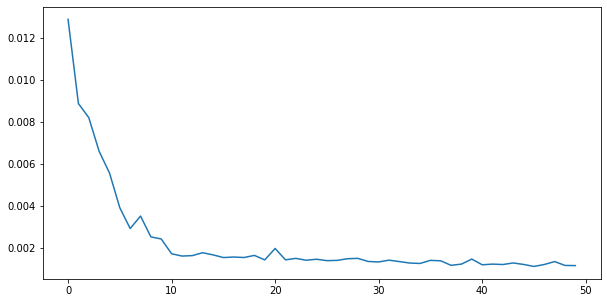

In [49]:
loss_per_epoch = model.history.history['loss']
plt.figure(figsize=(10,5))
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

## Evaluate on Test Data

In [50]:
first_eval_batch = scaled_train[-nobs:]

In [51]:
first_eval_batch

array([[0.59199872],
       [0.77383148],
       [0.71257917],
       [0.89048344],
       [0.92616051],
       [0.77038403],
       [0.90002405],
       [0.75082178],
       [0.87252465],
       [0.89336968],
       [1.        ],
       [0.62029985]])

In [52]:
first_eval_batch = first_eval_batch.reshape((1, n_input, n_features))

In [53]:
model.predict(first_eval_batch)

array([[0.68148905]], dtype=float32)

In [54]:
scaled_test[0]

array([0.64964323])

Now let's put this logic in a for loop to predict into the future for the entire test range.

----

In [55]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

In [56]:
current_batch.shape

(1, 12, 1)

In [57]:
current_batch

array([[[0.59199872],
        [0.77383148],
        [0.71257917],
        [0.89048344],
        [0.92616051],
        [0.77038403],
        [0.90002405],
        [0.75082178],
        [0.87252465],
        [0.89336968],
        [1.        ],
        [0.62029985]]])

In [58]:
np.append(current_batch[:,1:,:],[[[99]]],axis=1)

array([[[ 0.77383148],
        [ 0.71257917],
        [ 0.89048344],
        [ 0.92616051],
        [ 0.77038403],
        [ 0.90002405],
        [ 0.75082178],
        [ 0.87252465],
        [ 0.89336968],
        [ 1.        ],
        [ 0.62029985],
        [99.        ]]])

**NOTE: PAY CLOSE ATTENTION HERE TO WHAT IS BEING OUTPUTED AND IN WHAT DIMENSIONS. ADD YOUR OWN PRINT() STATEMENTS TO SEE WHAT IS TRULY GOING ON!!**

In [59]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [60]:
test_predictions

[array([0.68148905], dtype=float32),
 array([0.8144625], dtype=float32),
 array([0.78978515], dtype=float32),
 array([0.9554253], dtype=float32),
 array([0.9692599], dtype=float32),
 array([0.8418708], dtype=float32),
 array([0.9574875], dtype=float32),
 array([0.8163433], dtype=float32),
 array([0.94579256], dtype=float32),
 array([0.9616448], dtype=float32),
 array([1.0632024], dtype=float32),
 array([0.67075557], dtype=float32)]

In [61]:
scaled_test

array([[0.64964323],
       [0.77142628],
       [0.82658542],
       [0.94796761],
       [0.92191133],
       [0.85729175],
       [0.9166199 ],
       [0.8164836 ],
       [0.9339373 ],
       [0.88054197],
       [1.07696625],
       [0.62631284]])

## Inverse Transformations and Compare

In [62]:
true_predictions = scaler.inverse_transform(test_predictions)

In [63]:
true_predictions

array([[11531.21292549],
       [13189.79054958],
       [12881.99013495],
       [14948.020042  ],
       [15120.57895392],
       [13531.65429831],
       [14973.74188131],
       [13213.25007439],
       [14827.87054861],
       [15025.59594363],
       [16292.32329988],
       [11397.33416432]])

In [64]:
test

,Sales
DATE,
2019-02-01,11134
2019-03-01,12653
2019-04-01,13341
2019-05-01,14855
2019-06-01,14530
2019-07-01,13724
2019-08-01,14464
2019-09-01,13215
2019-10-01,14680


In [65]:
# IGNORE WARNINGS
test['Predictions'] = true_predictions

/home/marcelo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [66]:
test

,Sales,Predictions
DATE,,
2019-02-01,11134,11531.212925
2019-03-01,12653,13189.790550
2019-04-01,13341,12881.990135
2019-05-01,14855,14948.020042
2019-06-01,14530,15120.578954
2019-07-01,13724,13531.654298
2019-08-01,14464,14973.741881
2019-09-01,13215,13213.250074
2019-10-01,14680,14827.870549


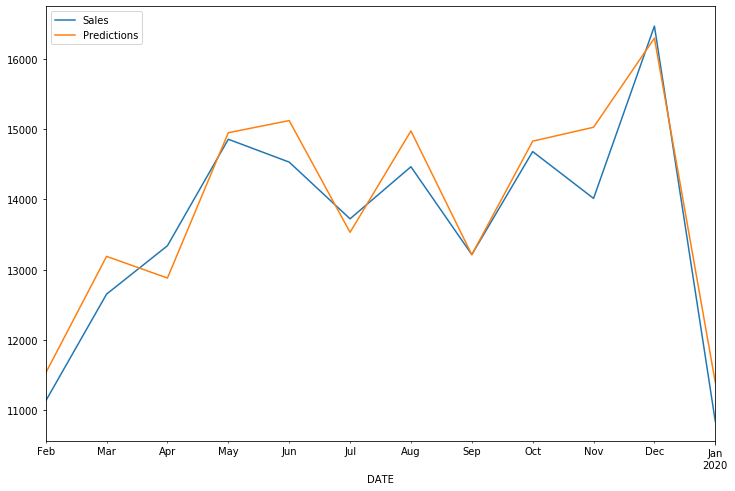

In [67]:
test.plot(figsize=(12,8))